In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

df = pd.read_csv(r"C:\Users\k\Downloads\data 7 hotel booking demand\hotel_bookings.csv")

In [2]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.drop(["arrival_date_year"], axis = 1, inplace = True)

In [4]:
df.drop(["arrival_date_week_number"], axis = 1, inplace = True)

In [5]:
df["stays_in_nights"] = df["stays_in_weekend_nights"] + df["stays_in_weekend_nights"]

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_month                     0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [7]:
df.children.fillna(0, inplace = True)

In [8]:
df.country.fillna("Unknown", inplace = True)

In [9]:
df.agent.fillna(0, inplace = True)

In [10]:
df.company.fillna(0, inplace = True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
df.drop("babies", axis = 1, inplace = True)

In [13]:
df["paying_guests"] = df["adults"] 

In [14]:
df.drop(["adults", "children"], axis = 1, inplace = True)

In [15]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [16]:
df.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [17]:
df.meal.replace(to_replace = dict(Undefined = "SC"), inplace = True)

In [18]:
df.meal.value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

In [19]:
df.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [20]:
df.drop(df[df["market_segment"] == "Undefined"].index, inplace = True)

In [21]:
df.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: market_segment, dtype: int64

In [22]:
df.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        3
Name: distribution_channel, dtype: int64

In [23]:
df.drop(df[df["distribution_channel"] == "Undefined"].index, inplace = True)

In [24]:
df.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Name: distribution_channel, dtype: int64

In [25]:
df.reserved_room_type.value_counts()

A    85993
D    19201
E     6535
F     2897
G     2094
B     1114
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [26]:
df.deposit_type.value_counts()

No Deposit    104636
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [27]:
df.customer_type.value_counts()

Transient          89612
Transient-Party    25120
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [28]:
df.adr.describe()

count    119385.000000
mean        101.833450
std          50.534866
min          -6.380000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [29]:
df.drop(df[df["adr"] == -6.38].index, inplace = True)

In [30]:
df.drop(df[df["adr"] == 5400].index, inplace = True)

In [31]:
df.adr.describe()

count    119383.000000
mean        101.789977
std          48.151668
min           0.000000
25%          69.290000
50%          94.590000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

In [32]:
df.reservation_status.value_counts()

Check-Out    75164
Canceled     43012
No-Show       1207
Name: reservation_status, dtype: int64

In [33]:
df.is_canceled.value_counts()

0    75164
1    44219
Name: is_canceled, dtype: int64

In [34]:
df.drop("reservation_status", axis = 1, inplace = True)

In [35]:
df.drop("reservation_status_date", axis = 1, inplace = True)

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,stays_in_nights,paying_guests
0,Resort Hotel,0,342,July,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,0,2
1,Resort Hotel,0,737,July,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,0,2
2,Resort Hotel,0,7,July,1,0,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,0,1
3,Resort Hotel,0,13,July,1,0,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,0,1
4,Resort Hotel,0,14,July,1,0,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,0,2


In [37]:
df.describe()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stays_in_nights,paying_guests
count,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000,119383.000000
mean,0.370396,104.014625,15.798656,0.927578,2.500289,0.031906,0.087123,0.137088,0.221112,74.830127,10.775789,2.321285,101.789977,0.062513,0.571338,1.855155,1.856387
std,0.482913,106.864118,8.780742,0.998583,1.908281,0.175750,0.844361,1.497471,0.652299,107.142434,53.945402,17.595228,48.151668,0.245283,0.792794,1.997165,0.579268
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.590000,0.000000,0.000000,2.000000,2.000000
75%,1.000000,160.000000,23.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.000000,2.000000
max,1.000000,737.000000,31.000000,19.000000,50.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,38.000000,55.000000


In [38]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
stays_in_nights                   0
paying_guests                     0
dtype: int64

In [39]:
df["price"] = df["adr"] * df["paying_guests"]

In [40]:
df.drop(["adr"], axis = 1, inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119383 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119383 non-null  object 
 1   is_canceled                     119383 non-null  int64  
 2   lead_time                       119383 non-null  int64  
 3   arrival_date_month              119383 non-null  object 
 4   arrival_date_day_of_month       119383 non-null  int64  
 5   stays_in_weekend_nights         119383 non-null  int64  
 6   stays_in_week_nights            119383 non-null  int64  
 7   meal                            119383 non-null  object 
 8   country                         119383 non-null  object 
 9   market_segment                  119383 non-null  object 
 10  distribution_channel            119383 non-null  object 
 11  is_repeated_guest               119383 non-null  int64  
 12  previous_cancell

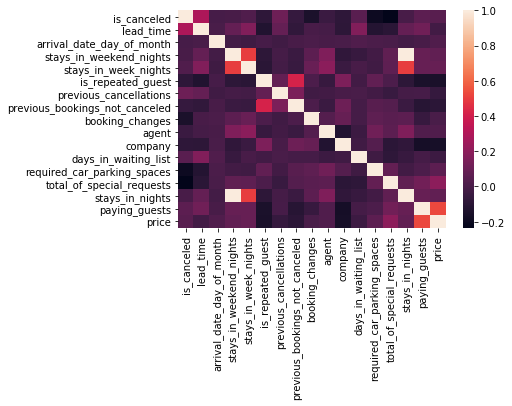

In [42]:
corr = df.corr()
sns.heatmap(corr,
           xticklabels = corr.columns,
           yticklabels = corr.columns)

In [43]:
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df[i] = d[i].transform(df[i].fillna('NA'))

In [44]:
features = df[df.columns.difference(['is_canceled'])]
labels = df['is_canceled']

In [45]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,stays_in_nights,paying_guests,price
0,1,0,342,5,1,0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0.0,0,2,0,0,0,2,0.0
1,1,0,737,5,1,0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0.0,0,2,0,0,0,2,0.0
2,1,0,7,5,1,0,1,0,59,3,1,0,0,0,0,2,0,0,0.0,0.0,0,2,0,0,0,1,75.0
3,1,0,13,5,1,0,1,0,59,2,0,0,0,0,0,0,0,0,304.0,0.0,0,2,0,0,0,1,75.0
4,1,0,14,5,1,0,2,0,59,6,3,0,0,0,0,0,0,0,240.0,0.0,0,2,0,1,0,2,196.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119383 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119383 non-null  int32  
 1   is_canceled                     119383 non-null  int64  
 2   lead_time                       119383 non-null  int64  
 3   arrival_date_month              119383 non-null  int32  
 4   arrival_date_day_of_month       119383 non-null  int64  
 5   stays_in_weekend_nights         119383 non-null  int64  
 6   stays_in_week_nights            119383 non-null  int64  
 7   meal                            119383 non-null  int32  
 8   country                         119383 non-null  int32  
 9   market_segment                  119383 non-null  int32  
 10  distribution_channel            119383 non-null  int32  
 11  is_repeated_guest               119383 non-null  int64  
 12  previous_cancell

# weight of evidence and information value

In [47]:
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [48]:
final_iv, IV = data_vars(df[df.columns.difference(["is_canceled"])],df.is_canceled)

C:\Users\k\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,agent,0.0,9.0,65706,25482,0.387818,40224,0.612182,0.576268,0.535150,0.074026,0.007753
1,agent,10.0,37.0,14375,5262,0.366052,9113,0.633948,0.118999,0.121242,-0.018673,0.007753
2,agent,38.0,535.0,39302,13475,0.342858,25827,0.657142,0.304733,0.343609,-0.120067,0.007753
3,arrival_date_day_of_month,1.0,16.0,62224,23222,0.373200,39002,0.626800,0.525159,0.518892,0.012005,0.000157
4,arrival_date_day_of_month,17.0,31.0,57159,20997,0.367344,36162,0.632656,0.474841,0.481108,-0.013111,0.000157
...,...,...,...,...,...,...,...,...,...,...,...,...
59,stays_in_week_nights,3.0,50.0,47748,17605,0.368707,30143,0.631293,0.398132,0.401030,-0.007252,0.000035
60,stays_in_weekend_nights,0.0,1.0,82620,30504,0.369208,52116,0.630792,0.689839,0.693364,-0.005096,0.000058
61,stays_in_weekend_nights,2.0,19.0,36763,13715,0.373065,23048,0.626935,0.310161,0.306636,0.011429,0.000058
62,total_of_special_requests,0.0,1.0,103539,40870,0.394730,62669,0.605270,0.924263,0.833764,0.103047,0.080472


In [50]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
13,lead_time,5.670999e-01
6,country,3.638530e-01
3,assigned_room_type,1.608933e-01
10,distribution_channel,1.515651e-01
11,hotel,8.300878e-02
25,total_of_special_requests,8.047209e-02
7,customer_type,7.093885e-02
17,previous_bookings_not_canceled,5.300001e-02
5,company,5.092461e-02
8,days_in_waiting_list,4.053926e-02


In [51]:
transform_vars_list = df.columns.difference(['is_canceled'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [52]:
transform_vars_list

Index(['agent', 'arrival_date_day_of_month', 'arrival_date_month',
       'assigned_room_type', 'booking_changes', 'company', 'country',
       'customer_type', 'days_in_waiting_list', 'deposit_type',
       'distribution_channel', 'hotel', 'is_repeated_guest', 'lead_time',
       'market_segment', 'meal', 'paying_guests',
       'previous_bookings_not_canceled', 'previous_cancellations', 'price',
       'required_car_parking_spaces', 'reserved_room_type', 'stays_in_nights',
       'stays_in_week_nights', 'stays_in_weekend_nights',
       'total_of_special_requests'],
      dtype='object')

In [53]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd))
        except:
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd1))

In [54]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,stays_in_nights,paying_guests,price,new_agent,new_arrival_date_day_of_month,new_arrival_date_month,new_assigned_room_type,new_booking_changes,new_company,new_country,new_customer_type,new_days_in_waiting_list,new_deposit_type,new_distribution_channel,new_hotel,new_is_repeated_guest,new_lead_time,new_market_segment,new_meal,new_paying_guests,new_previous_bookings_not_canceled,new_previous_cancellations,new_price,new_required_car_parking_spaces,new_reserved_room_type,new_stays_in_nights,new_stays_in_week_nights,new_stays_in_weekend_nights,new_total_of_special_requests
0,1,0,342,5,1,0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0.0,0,2,0,0,0,2,0.0,0.074026,0.012005,-0.001873,-0.571711,-0.913530,0.050208,0.565321,0.130725,-0.036899,0.000863,-0.925596,-0.425644,0.031737,1.229300,0.012284,0.022887,0.005445,0.023628,-0.002438,-0.092086,0.000439,-0.237952,-0.005096,0.004826,-0.005096,0.103047
1,1,0,737,5,1,0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0.0,0,2,0,0,0,2,0.0,0.074026,0.012005,-0.001873,-0.571711,-0.913530,0.050208,0.565321,0.130725,-0.036899,0.000863,-0.925596,-0.425644,0.031737,1.229300,0.012284,0.022887,0.005445,0.023628,-0.002438,-0.092086,0.000439,-0.237952,-0.005096,0.004826,-0.005096,0.103047
2,1,0,7,5,1,0,1,0,59,3,1,0,0,0,0,2,0,0,0.0,0.0,0,2,0,0,0,1,75.0,0.074026,0.012005,-0.001873,-0.571711,0.036111,0.050208,-0.663616,0.130725,-0.036899,0.000863,-0.925596,-0.425644,0.031737,-1.381448,0.012284,0.022887,0.005445,0.023628,-0.002438,-0.092086,0.000439,0.084270,-0.005096,0.004826,-0.005096,0.103047
3,1,0,13,5,1,0,1,0,59,2,0,0,0,0,0,0,0,0,304.0,0.0,0,2,0,0,0,1,75.0,-0.120067,0.012005,-0.001873,0.285233,0.036111,0.050208,-0.663616,0.130725,-0.036899,0.000863,-0.925596,-0.425644,0.031737,-0.590979,0.012284,0.022887,0.005445,0.023628,-0.002438,-0.092086,0.000439,0.084270,-0.005096,0.004826,-0.005096,0.103047
4,1,0,14,5,1,0,2,0,59,6,3,0,0,0,0,0,0,0,240.0,0.0,0,2,0,1,0,2,196.0,-0.120067,0.012005,-0.001873,0.285233,0.036111,0.050208,-0.663616,0.130725,-0.036899,0.000863,0.165818,-0.425644,0.031737,-0.590979,-0.013729,0.022887,0.005445,0.023628,-0.002438,0.091110,0.000439,0.084270,-0.005096,0.004826,-0.005096,0.103047


# variable importance using random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

0.9959206922258613


In [56]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [57]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
13,lead_time,0.139552
6,country,0.121427
9,deposit_type,0.102799
19,price,0.087929
1,arrival_date_day_of_month,0.063114
25,total_of_special_requests,0.058526
0,agent,0.057956
14,market_segment,0.050683
2,arrival_date_month,0.043742
18,previous_cancellations,0.038078


In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select = 20)
fit = rfe.fit(features, labels)


C:\Users\k\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\k\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [59]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [60]:
Selected[Selected["RFE"] == True]

,index,RFE
1,arrival_date_day_of_month,True
3,assigned_room_type,True
4,booking_changes,True
6,country,True
7,customer_type,True
9,deposit_type,True
10,distribution_channel,True
11,hotel,True
12,is_repeated_guest,True
14,market_segment,True


# Variable importance using ExtraTrees

In [61]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.04483904 0.0604183  0.04981658 0.02892016 0.02131354 0.00471568
 0.11217662 0.03235644 0.00293999 0.12857442 0.01913476 0.01396683
 0.0047441  0.11857017 0.04384458 0.01661313 0.01553063 0.00199306
 0.02406919 0.07087313 0.02323007 0.01842053 0.01831632 0.04505248
 0.01806002 0.06151021]


In [62]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [63]:
FI = FI.reset_index()

In [64]:
FI.sort_values(["Extratrees"], ascending = False)

,index,Extratrees
9,deposit_type,0.128574
13,lead_time,0.118570
6,country,0.112177
19,price,0.070873
25,total_of_special_requests,0.061510
1,arrival_date_day_of_month,0.060418
2,arrival_date_month,0.049817
23,stays_in_week_nights,0.045052
0,agent,0.044839
14,market_segment,0.043845


# Chi2 test

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [66]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)


In [67]:
chi_sq = chi_sq.reset_index()

In [68]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
13,lead_time,1126732.24
5,company,222049.25
6,country,180442.62
8,days_in_waiting_list,46762.25
0,agent,39583.51
9,deposit_type,23515.56
19,price,19723.84
18,previous_cancellations,11851.28
3,assigned_room_type,9819.85
25,total_of_special_requests,7234.12


# L1 feature selection

In [69]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

In [70]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()

In [71]:
l1[l1['L1'] == True]

,index,L1
0,agent,True
1,arrival_date_day_of_month,True
2,arrival_date_month,True
3,assigned_room_type,True
4,booking_changes,True
5,company,True
6,country,True
7,customer_type,True
8,days_in_waiting_list,True
9,deposit_type,True


# Combine all

In [72]:
from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

# Vote each variable

In [73]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [74]:
score_table['final_score'] = score_table.sum(axis=1)

In [75]:
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
6,country,1,1,1,1,1,1,6
13,lead_time,1,1,1,1,0,1,5
9,deposit_type,0,1,1,0,1,1,4
19,price,0,1,1,0,0,1,3
1,arrival_date_day_of_month,0,1,0,0,1,1,3
11,hotel,1,0,0,0,1,1,3
10,distribution_channel,1,0,0,0,1,1,3
25,total_of_special_requests,0,0,1,0,1,1,3
3,assigned_room_type,1,0,0,0,1,1,3
8,days_in_waiting_list,0,0,0,1,0,1,2


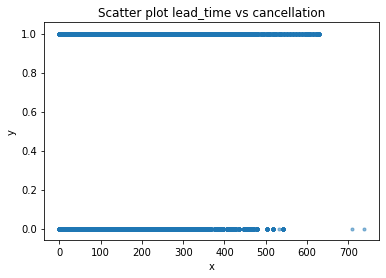

In [76]:
x = df.lead_time
y = df.is_canceled
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Scatter plot lead_time vs cancellation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

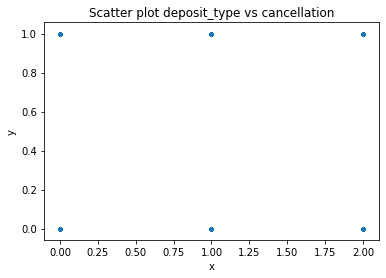

In [77]:
x = df.deposit_type
y = df.is_canceled
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Scatter plot deposit_type vs cancellation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

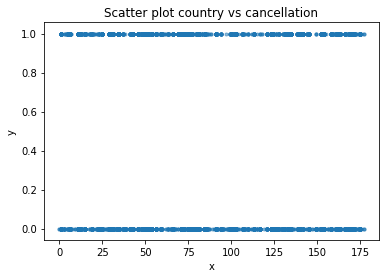

In [78]:
x = df.country
y = df.is_canceled
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Scatter plot country vs cancellation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Multicolinearity

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [80]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [81]:
features = features[list(score_table[score_table['final_score'] >= 2]['index'])]

In [82]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [83]:
list(vif['Features'])

['agent',
 'arrival_date_day_of_month',
 'assigned_room_type',
 'booking_changes',
 'company',
 'country',
 'days_in_waiting_list',
 'deposit_type',
 'distribution_channel',
 'hotel',
 'is_repeated_guest',
 'lead_time',
 'previous_bookings_not_canceled',
 'previous_cancellations',
 'price',
 'required_car_parking_spaces',
 'reserved_room_type',
 'stays_in_nights',
 'stays_in_week_nights',
 'total_of_special_requests']

# Descriptive stats and visualization for selected features


In [84]:
final_vars = list(vif['Features']) + ["is_canceled"]

In [85]:
df1 = df[final_vars].fillna(0)

In [86]:
df1.describe()

,agent,arrival_date_day_of_month,assigned_room_type,booking_changes,company,country,days_in_waiting_list,deposit_type,distribution_channel,hotel,is_repeated_guest,lead_time,previous_bookings_not_canceled,previous_cancellations,price,required_car_parking_spaces,reserved_room_type,stays_in_nights,stays_in_week_nights,total_of_special_requests,is_canceled
count,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00,119383.00
mean,74.83,15.80,1.33,0.22,10.78,93.31,2.32,0.12,2.59,0.34,0.03,104.01,0.14,0.09,195.71,0.06,0.99,1.86,2.50,0.57,0.37
std,107.14,8.78,1.88,0.65,53.95,44.86,17.60,0.33,0.91,0.47,0.18,106.86,1.50,0.84,121.71,0.25,1.70,2.00,1.91,0.79,0.48
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7.00,8.00,0.00,0.00,0.00,56.00,0.00,0.00,3.00,0.00,0.00,18.00,0.00,0.00,120.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,9.00,16.00,0.00,0.00,0.00,81.00,0.00,0.00,3.00,0.00,0.00,69.00,0.00,0.00,176.00,0.00,0.00,2.00,2.00,0.00,0.00
75%,152.00,23.00,3.00,0.00,0.00,135.00,0.00,0.00,3.00,1.00,0.00,160.00,0.00,0.00,244.80,0.00,3.00,4.00,3.00,1.00,1.00
max,535.00,31.00,11.00,21.00,543.00,177.00,391.00,2.00,3.00,1.00,1.00,737.00,72.00,26.00,1428.00,8.00,9.00,38.00,50.00,5.00,1.00


C:\Users\k\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


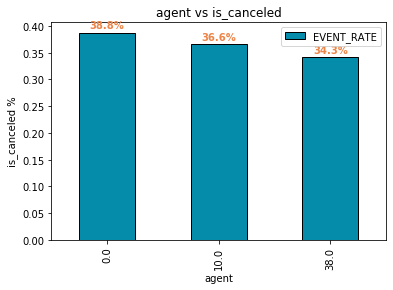

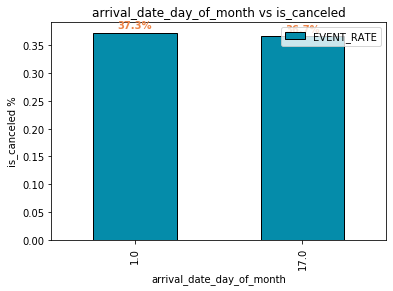

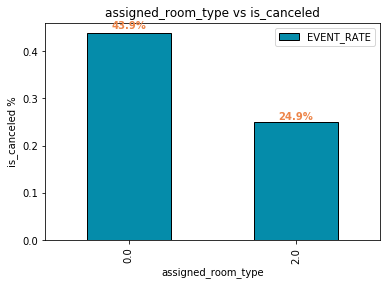

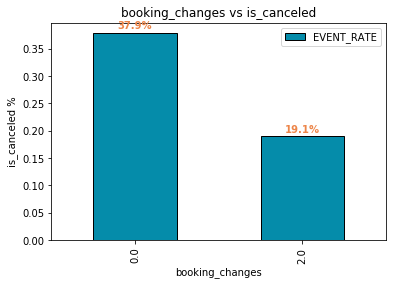

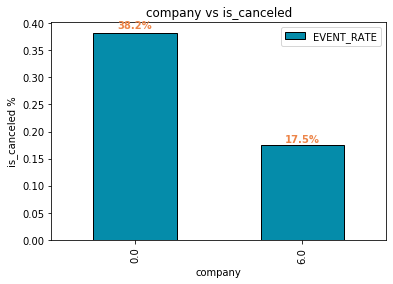

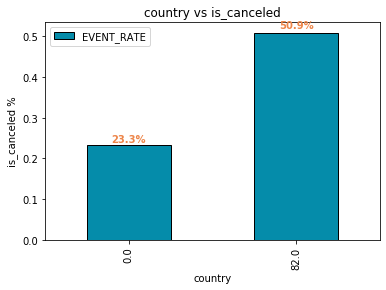

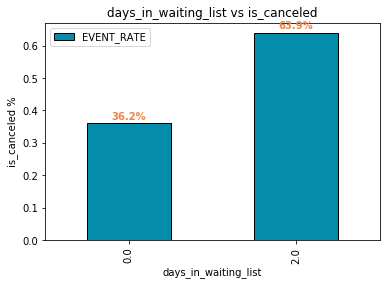

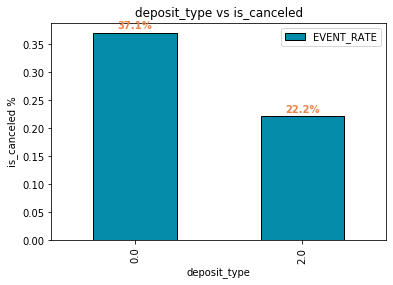

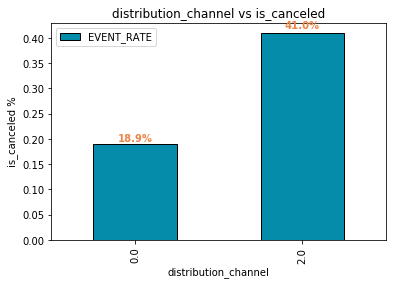

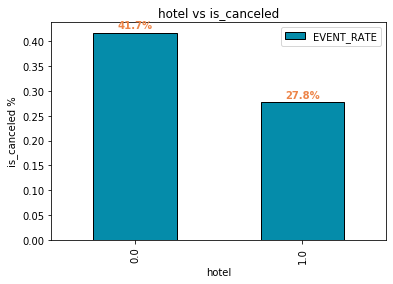

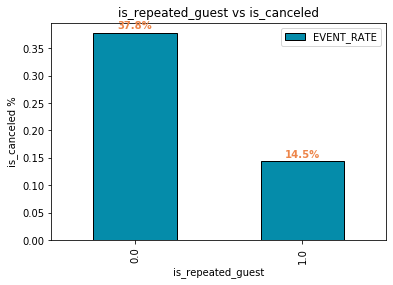

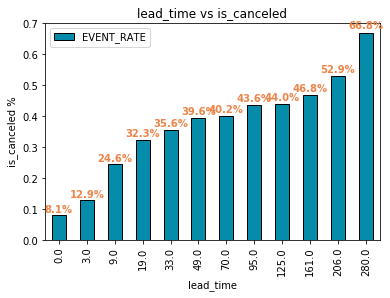

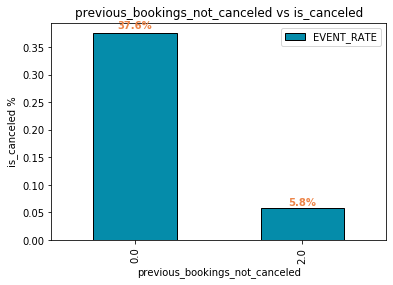

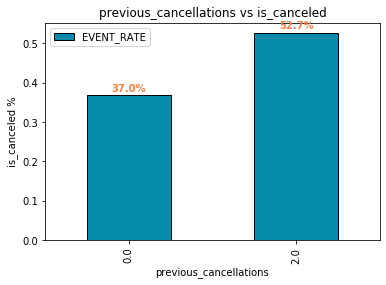

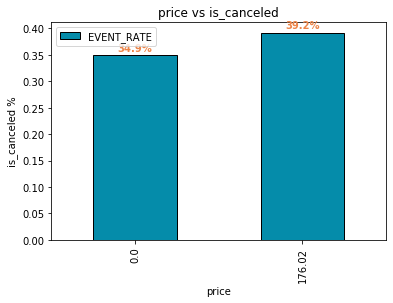

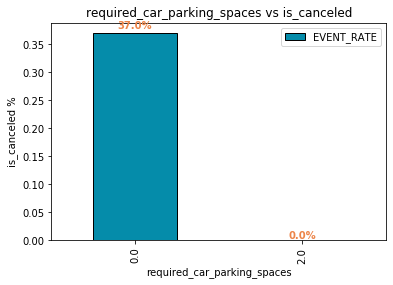

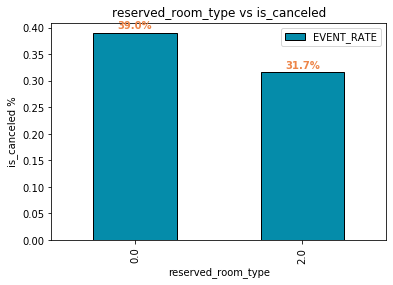

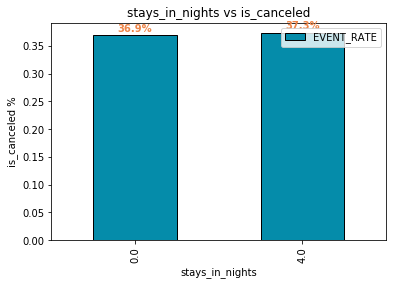

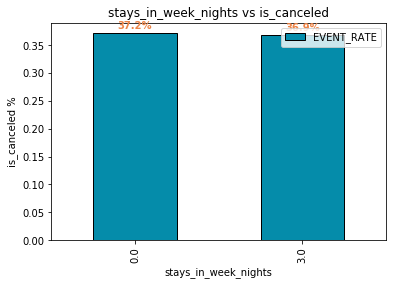

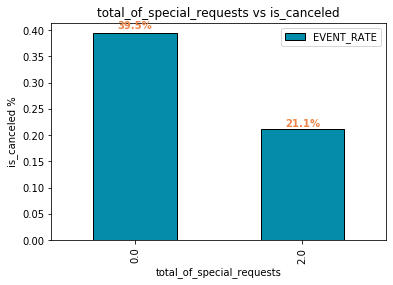

In [87]:
bar_color = '#058caa'
num_color = '#ed8549'

final_iv,_ = data_vars(df1,df1['is_canceled'])
final_iv = final_iv[(final_iv.VAR_NAME != 'is_canceled')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('is_canceled'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('is_canceled') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

In [89]:
df.shape

(119383, 53)

In [90]:
df1.shape

(119383, 21)

In [91]:
df1.columns

Index(['agent', 'arrival_date_day_of_month', 'assigned_room_type',
       'booking_changes', 'company', 'country', 'days_in_waiting_list',
       'deposit_type', 'distribution_channel', 'hotel', 'is_repeated_guest',
       'lead_time', 'previous_bookings_not_canceled', 'previous_cancellations',
       'price', 'required_car_parking_spaces', 'reserved_room_type',
       'stays_in_nights', 'stays_in_week_nights', 'total_of_special_requests',
       'is_canceled'],
      dtype='object')

In [92]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'stays_in_nights', 'paying_guests', 'price', 'new_agent',
       'new_arrival_date_day_of_month', 'new_arrival_date_month',
       'new_assigned_room_type', 'new_booking_changes', 'new_company',
       'new_country', 'new_customer_type', 'new_days_in_waiting_list',
       'new_deposit_type', 'new_distribution_channel', 'new_hotel',
       'new_is_repeated_guest', 'new_lead_time', 'new_market_segment',
       'new_meal', 'new_paying_guests', 'new_previo

In [99]:
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

,agent,arrival_date_day_of_month,assigned_room_type,booking_changes,company,country,days_in_waiting_list,deposit_type,distribution_channel,hotel,is_repeated_guest,lead_time,previous_bookings_not_canceled,previous_cancellations,price,required_car_parking_spaces,reserved_room_type,stays_in_nights,stays_in_week_nights,total_of_special_requests
28192,240.00,19,4,0,0.00,135,0,0,3,1,0,238,0,0,220.00,0,4,2,4,1
27458,201.00,25,4,0,0.00,59,0,0,3,1,0,272,0,0,263.20,0,4,4,3,0
20903,240.00,13,0,0,0.00,135,0,0,3,1,0,1,0,0,130.00,0,0,0,1,0
7994,1.00,7,3,0,0.00,135,0,1,3,1,0,238,0,0,89.00,0,3,0,3,0
74535,1.00,21,0,0,0.00,135,0,1,3,0,0,339,0,1,124.00,0,0,2,1,0


In [105]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
'''sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)''' #since already its categorical dep variable


'sc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [106]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() #classifier is the object of logistic reg class
classifier.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [113]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, pred_test)                                           
cm

array([[17472,  1308],
       [ 5135,  5931]], dtype=int64)

In [114]:
pd.crosstab(y_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,25857,8196
1,25194,7926


In [115]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)

print(accuracy_train,accuracy_test)

0.7836090108000044 0.7841251759029686


score is good, not great though

In [116]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()

classifier.fit(x_train,y_train)

pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)
print(accuracy_train,accuracy_test)

0.4801143661279694 0.48110299537626483


useless to use naive bayes

In [118]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(x_train,y_train)

pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)

print(accuracy_train,accuracy_test)

0.9958117873058066 0.8861488976747303


looks like we got our model...afterall its forest 

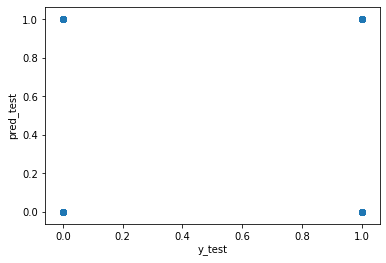

In [125]:
plt.scatter(y_test, pred_test, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred_test")
plt.show()

since our objective is to predict whether the booking is canceled(0, 1) , given features.

In [119]:
cm = confusion_matrix(y_test, pred_test)                                           
cm

array([[17559,  1221],
       [ 2177,  8889]], dtype=int64)

See the increase in the number of true positives and true negatives.

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

print(rf_random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.1min finished


{'n_estimators': 445, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [123]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(**rf_random.best_params_)

classifier.fit(x_train,y_train)

pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)

In [124]:
print(accuracy_train, accuracy_test)

0.9842523202698326 0.8878911746967768
